# MIMIC IV Exploration

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import psycopg2

from matplotlib import pyplot as plt

## Get Connection

In [3]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'mimiciv'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Gender Distribution

In [4]:
genderQry = query_schema + \
"""
SELECT gender, COUNT(*) AS cnt FROM mimiciv.patients GROUP BY gender;
"""
genderDf = pd.read_sql_query(genderQry, con)

In [5]:
genderDf

,gender,cnt
0,F,199707
1,M,182571


Text(0.5, 1.0, 'Gender Piechart')

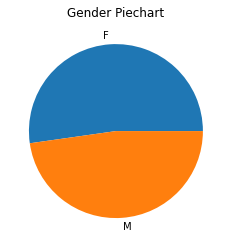

In [6]:
fig, ax = plt.subplots()
plt.pie(genderDf.cnt, labels=genderDf.gender)
ax.set_title('Gender Piechart')

## Age Distribution

In [7]:
ageQry = query_schema + \
"""
SELECT anchor_age AS age FROM mimiciv.patients;
"""
ageDf = pd.read_sql_query(ageQry, con)

Text(0, 0.5, 'Count')

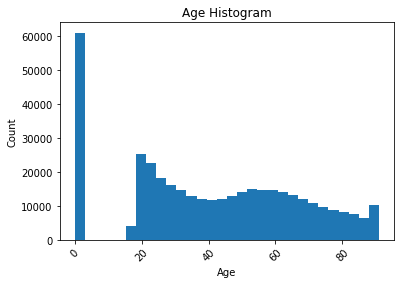

In [8]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(ageDf.age, bins=30)

ax.set_title('Age Histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Count')


## Admission Type

In [9]:
atQry = query_schema + \
"""
SELECT admission_type, COUNT(*) AS cnt FROM mimiciv.admissions GROUP BY admission_type;
"""
atDf = pd.read_sql_query(atQry, con)

In [10]:
atDf

,admission_type,cnt
0,AMBULATORY OBSERVATION,7254
1,DIRECT EMER.,21581
2,DIRECT OBSERVATION,19991
3,ELECTIVE,72072
4,EU OBSERVATION,100445
5,EW EMER.,157896
6,OBSERVATION ADMIT,55497
7,SURGICAL SAME DAY ADMISSION,41074
8,URGENT,47930


Text(0.5, 0, 'Admission Type')

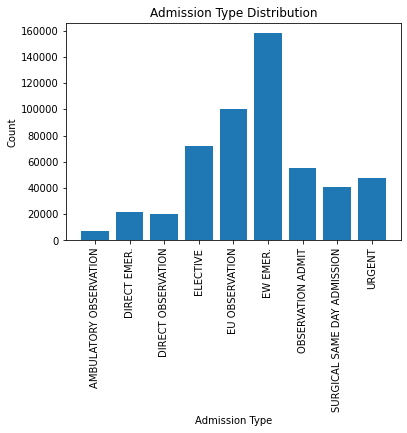

In [11]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=atDf.admission_type, height=atDf.cnt)

ax.set_title('Admission Type Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admission Type')

## Admission Location

In [12]:
alQry = query_schema + \
"""
SELECT admission_location, COUNT(*) AS cnt FROM mimiciv.admissions GROUP BY admission_location;
"""
alDf = pd.read_sql_query(alQry, con)

In [13]:
alDf.dropna(inplace=True)

In [14]:
alDf

,admission_location,cnt
0,AMBULATORY SURGERY TRANSFER,191
1,CLINIC REFERRAL,10670
2,EMERGENCY ROOM,245744
3,INFORMATION NOT AVAILABLE,379
4,INTERNAL TRANSFER TO OR FROM PSYCH,4467
5,PACU,6067
6,PHYSICIAN REFERRAL,127494
7,PROCEDURE SITE,8449
8,TRANSFER FROM HOSPITAL,39121
9,TRANSFER FROM SKILLED NURSING FACILITY,4063


Text(0.5, 0, 'Admission Location')

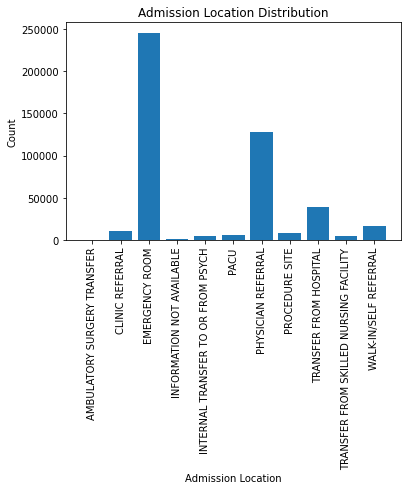

In [15]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=alDf.admission_location, height=alDf.cnt)

ax.set_title('Admission Location Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admission Location')

## Discharge Location

In [16]:
dischargeQry = query_schema + \
"""
SELECT discharge_location, COUNT(*) AS cnt FROM mimiciv.admissions GROUP BY discharge_location;
"""
dischargeDf = pd.read_sql_query(dischargeQry, con)

In [17]:
dischargeDf.dropna(inplace=True)

In [18]:
dischargeDf

,discharge_location,cnt
0,ACUTE HOSPITAL,3499
1,AGAINST ADVICE,2718
2,ASSISTED LIVING,584
3,CHRONIC/LONG TERM ACUTE CARE,7591
4,DIED,9238
5,HEALTHCARE FACILITY,168
6,HOME,222173
7,HOME HEALTH CARE,86026
8,HOSPICE,3679
9,OTHER FACILITY,1455


Text(0.5, 0, 'Discharge Location')

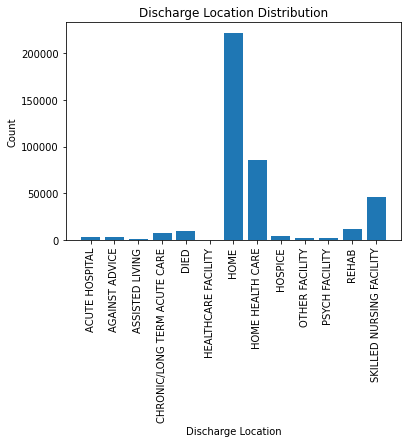

In [19]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=dischargeDf.discharge_location, height=dischargeDf.cnt)

ax.set_title('Discharge Location Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Discharge Location')

## Ethnicity Distribution

In [20]:
ethnicityQry = query_schema + \
"""
SELECT ethnicity, COUNT(*) AS cnt FROM mimiciv.admissions GROUP BY ethnicity;
"""
ethnicityDf = pd.read_sql_query(ethnicityQry, con)

In [21]:
ethnicityDf

,ethnicity,cnt
0,AMERICAN INDIAN/ALASKA NATIVE,1535
1,ASIAN,24506
2,BLACK/AFRICAN AMERICAN,80293
3,HISPANIC/LATINO,29823
4,OTHER,26813
5,UNABLE TO OBTAIN,3740
6,UNKNOWN,19400
7,WHITE,337630


([<matplotlib.patches.Wedge at 0x7f1920273400>,
 [Text(1.0999533722321622, 0.01012812495453975, 'AMERICAN INDIAN/ALASKA NATIVE'),
  Text(1.084985771549132, 0.18112392314637674, 'ASIAN'),
  Text(0.7710699851085943, 0.7845069012218009, 'BLACK/AFRICAN AMERICAN'),
  Text(0.12757910077774534, 1.092576575368858, 'HISPANIC/LATINO'),
  Text(-0.24378875093217703, 1.0726448829500512, 'OTHER'),
  Text(-0.4351895781887411, 1.0102524590595687, 'UNABLE TO OBTAIN'),
  Text(-0.5707798875132819, 0.940324582264191, 'UNKNOWN'),
  Text(-0.48285248766192607, -0.9883589809166959, 'WHITE')])

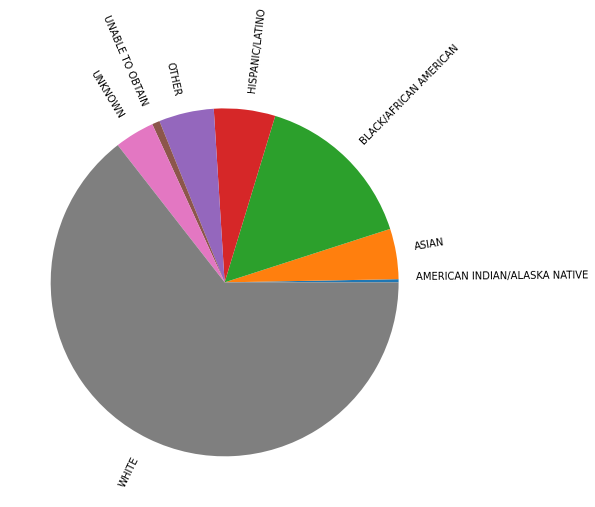

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(ethnicityDf.cnt, labels=ethnicityDf.ethnicity, rotatelabels = True)
# ax.set_title('Ethnicity Piechart')